In [ ]:
!pip install - U pandas
!pip install - U numpy
!pip install - U ply == 5.10.0

In [1]:
# Question 1: Linear Regression
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd


x = np.genfromtxt('../data/q1/linearX.csv', delimiter='\n')
y = np.genfromtxt('../data/q1/linearY.csv', delimiter='\n')

x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))


ERROR: Could not find a version that satisfies the requirement ply==5.10.0 (from versions: 3.4, 3.6, 3.8, 3.9, 3.10, 3.11)
ERROR: No matching distribution found for ply==5.10.0


In [2]:
x.shape

(100, 1)

In [3]:
y.shape

(100, 1)

In [4]:
# Visualize data
fig = px.scatter(x[:, 0], y[:, 0])
fig.show()


In [5]:
# Normalize the data
x = (x - x.mean()) / x.std()
print(x.mean(), x.std())

# Add intercept term to x
x = np.append(np.ones((x.shape)), x, axis=1)


# Num of examples and features (with intercept)
m = x.shape[0]
n = x.shape[1]

# Visualize data
fig = px.scatter(x[:, 1], y[:, 0])
fig.show()


3.508304757815495e-16 1.0


In [6]:
# Question 1.a - Batch gradient descent method for optimizing J(θ)

# Initialize params
theta = np.zeros((2, 1))
alpha = 1e-2

# Prediction function: h(θ) = x^Tθ


def predict(x, theta):
    return x.dot(theta)

# Cost function: J(θ) = 1/2m * Σ(y-h(θ))^2


def cost(x, y, theta):
    return (1/(2*m)) * np.sum((y - predict(x, theta))**2)


cost_0 = cost(x, y, theta)
print(f"Initial Cost value: {cost_0}")


def cost_grd(x, y, theta):
    return (1/m) * (np.zeros((2, 1)) + x.T.dot(x.dot(theta)-y))

# Gradient descent function


def batch_gradient_descent(x, y, theta, alpha, threshold=10e-8, num_iter=1000000):

    prev_cost = cost_0
    c = 0.0
    cost_hist = np.array([cost_0])
    theta_hist = theta
    i = 1
    while True:
        # Compute gradient and update theta
        theta -= alpha * cost_grd(x, y, theta)
        theta_hist = np.append(theta_hist, theta, axis=1)
        c = cost(x, y, theta)
        cost_hist = np.append(cost_hist, c)
        i += 1

        # Stop if the cost is below a threshold or if the num of iterations is above a certain amount
        if abs(cost_grd(x, y, theta)[1]) <= threshold or i >= num_iter:
            break
        prev_cost = c

    return theta, cost_hist, theta_hist, i


theta, cost_hist, theta_hist, iterations = batch_gradient_descent(
    x, y, theta, alpha)

print(f'Cost of the model is {cost_hist[-1]} with {iterations} iterations')

# p cost decrease
fig = px.scatter(range(iterations), cost_hist)
fig.show()


Initial Cost value: 0.4966279047145
Cost of the model is 1.197530238073229e-06 with 947 iterations


File written successfully


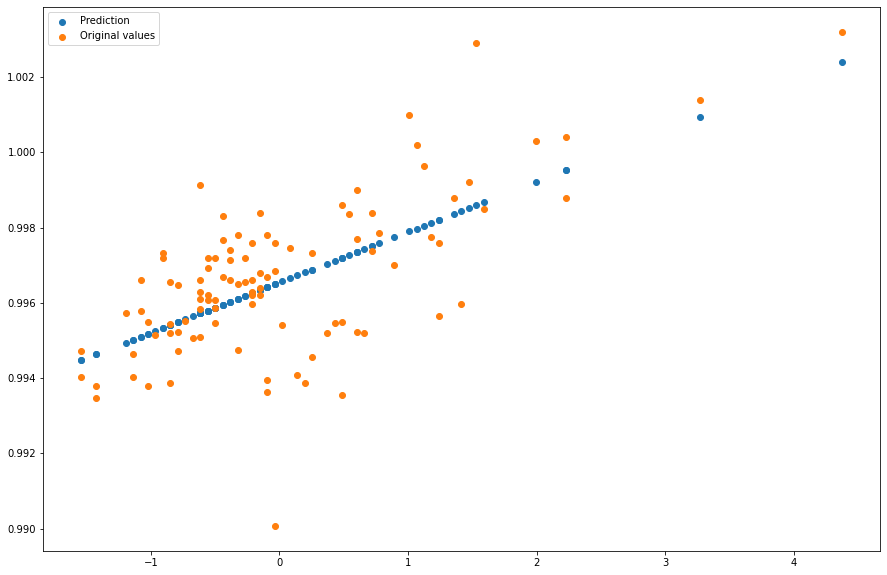

In [7]:
# Question 1.b - pting data and hypothesis function

# Create predictions from our linear regression model and write them to a file
predictions = x.dot(theta)
with open('results.txt', 'w+') as f:
    for item in predictions:
        f.write('%s\n' % item[0])

    print("File written successfully")
f.close()

fig = plt.figure(figsize=(15, 10))
plt.scatter(x[:, 1], predictions, label='Prediction')
plt.scatter(x[:, 1], y, label='Original values')
plt.legend()
plt.savefig('q1_b.png', dpi=1000)


In [8]:
# Question 1.c -  Drawing a 3d mesh of error function and the parameters
import collections
from matplotlib.animation import FuncAnimation


def cost_plt(t0, t1, p):
    return np.sum((p.y-p.x.dot(np.array([[t0], [t1]])))**2)


# Create tuple to p the error function
P = collections.namedtuple('P', ['x', 'y'])
points = P(x, y)

# Create surface and contour to better see gradient descent working
t0, t1 = np.linspace(-0.5, 3.0, 50), np.linspace(-0.5, 3.0, 50)
t0, t1 = np.meshgrid(t0, t1)
c = np.array([cost_plt(t_0, t_1, points)
             for t_0, t_1 in zip(t0.ravel(), t1.ravel())])
c_plt = c.reshape(t0.shape)

# Create a mesh of points to p in
theta_0, theta_1 = np.meshgrid(theta_hist[0], theta_hist[1])
c = np.array([cost_plt(theta0, theta1, points)
             for theta0, theta1 in zip(theta_0.ravel(), theta_1.ravel())])
c_plt_grd = c.reshape(theta_0.shape)


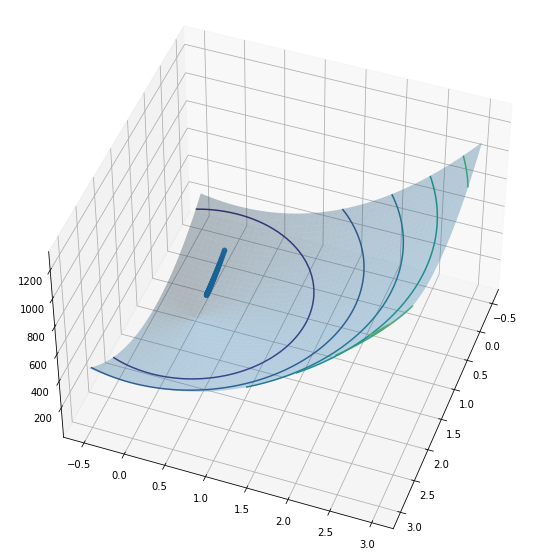

In [9]:
# p Graph
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 20)
ax.plot_surface(t0, t1, c_plt, alpha=0.3)

ax.contour3D(t0, t1, c_plt)

sc = ax.scatter([], [], [])
x_, y_, z_ = [], [], []


def animate(i):
    x_.append(theta_0.ravel()[i]), y_.append(
        theta_1.ravel()[i]), z_.append(c_plt_grd.ravel()[i])
    sc._offsets3d = (x_, y_, z_)
    return sc


anim = FuncAnimation(fig, animate, frames=np.arange(
    0, 100), interval=200, repeat_delay=3000, blit=False)
anim.save('q1_c.gif', writer='pillow')


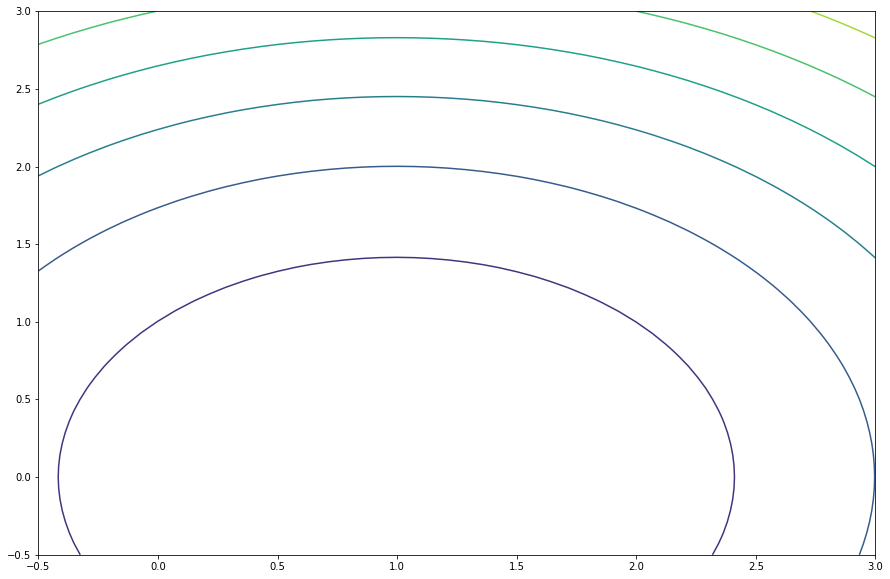

In [10]:
# Question 1.d -  Drawing the contours of error function and the parameters
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
c = ax.contour(t0, t1, c_plt)

p, = ax.plot([], [])
x_, y_ = [], []


def init():
    p.set_data([], [])
    return p


def animate_contour(i):
    x_.append(theta_0.ravel()[i]), y_.append(theta_1.ravel()[i])
    p.set_data(x_, y_)
    return p


anim1 = FuncAnimation(fig, animate_contour, init_func=init, frames=np.arange(
    0, 100), interval=200, repeat_delay=3000, blit=False)
anim1.save('q1_d.gif', writer='pillow')


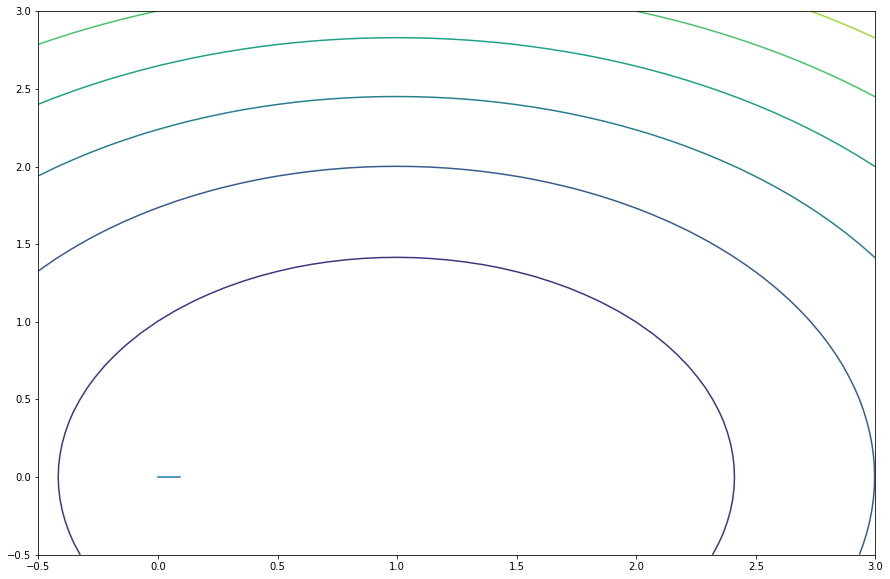

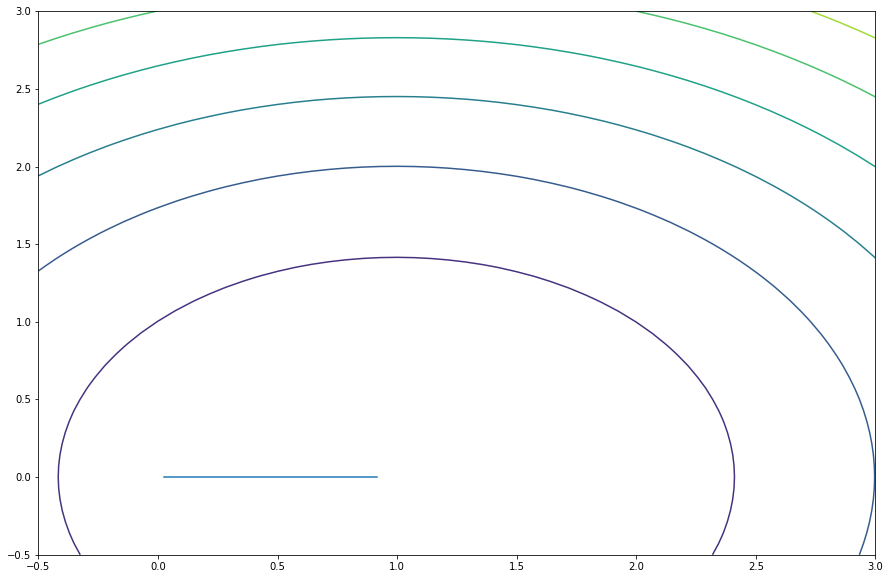

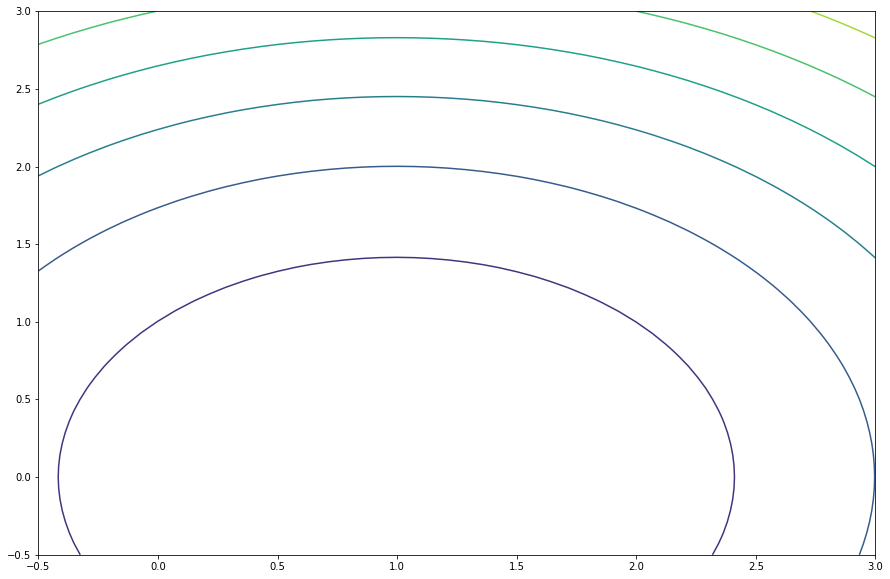

In [11]:
for step in [0.001, 0.025, 0.1]:
    theta = np.zeros((2, 1))
    theta, cost_hist, theta_hist, iterations = batch_gradient_descent(
        x, y, theta, step)

    # Create surface and contour to better see gradient descent working
    t0, t1 = np.linspace(-0.5, 3.0, 50), np.linspace(-0.5, 3.0, 50)
    t0, t1 = np.meshgrid(t0, t1)
    c = np.array([cost_plt(t_0, t_1, points)
                 for t_0, t_1 in zip(t0.ravel(), t1.ravel())])
    c_plt = c.reshape(t0.shape)

    # Create a mesh of points to p in
    theta_0, theta_1 = np.meshgrid(theta_hist[0], theta_hist[1])
    c = np.array([cost_plt(theta0, theta1, points)
                 for theta0, theta1 in zip(theta_0.ravel(), theta_1.ravel())])
    c_plt_grd = c.reshape(theta_0.shape)

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    c = ax.contour(t0, t1, c_plt)

    p, = ax.plot([], [])
    x_, y_ = [], []

    anim1 = FuncAnimation(fig, animate_contour, init_func=init, frames=np.arange(
        0, 100), interval=200, repeat_delay=3000, blit=False)
    file = "q1_e"+str(step)+".gif"
    anim1.save(file, writer='pillow')


# 